In [246]:
def get_barycenter(points):
    bc=[0,0,0]
    for i in points:
        bc+=i
    return bc/len(points)




def plot_polygon(points,plot_with_barycenter=False):
    plot_coords=np.vstack([points,points[0]])     
    x_s,y_s=zip(*plot_coords)
    plt.plot(x_s,y_s)
    if plot_with_barycenter:
        for i in range(0,len(plot_coords),2):
            plot_coords =np.insert(plot_coords,3*i,barycenter)        
        x_s2,y_s2=zip(*plot_coords.reshape(len(plot_coords)/2,2))
        plt.plot(x_s2,y_s2 )

[[-0.12917921 -0.40189087]
 [-0.21529868  0.02870649]
 [-0.12917921  0.45930386]
 [ 0.04305974  0.45930386]
 [ 0.38753763 -0.14353246]
 [ 0.04305974 -0.40189087]]
[  3.46944695e-18   6.47630098e-17]


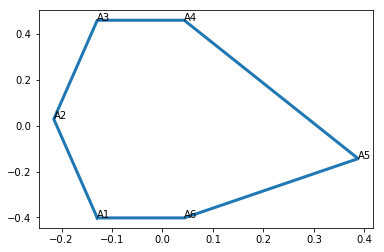

In [247]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



#Make a reference polygon#

ref_coord = [[.1,0], [0,0.5], [.1,1], [.3,1], [.7,.3],[.3,0]]
ref_coord=np.array(ref_coord)


#Calculate mean and move points to the center
mu_coord = ref_coord.mean(0)
centralized_coord = ref_coord-mu_coord
#Calculate squared sum of X-X_mean
ss_ref_coord = (centralized_coord**2.).sum()
#Calculate Frobenius norm
norm_ref_coord = np.sqrt(ss_ref_coord)
#normalize to origin
centralized_coord /= norm_ref_coord


plot_coords=np.vstack([centralized_coord,centralized_coord[0]]) #repeat the first point to create a 'closed loop'
#coord=np.array(centralized_coord)

# Compute barycenter
barycenter=np.array(centralized_coord.sum(0)/6)

xs, ys = zip(*plot_coords) #create lists of x and y values
print(centralized_coord)



plt.figure()
plt.plot(xs,ys,linewidth=3) 

index_x=['A1','A2','A3','A4','A5','A6']
for i, txt in enumerate(index_x):
    plt.annotate(txt,(xs[i],ys[i]))
    
#plt.plot(barycenter[0],barycenter[1],'o')
print(barycenter)

In [248]:

for i in range(0,len(plot_coords),2):
    plot_coords =np.insert(plot_coords,3*i,barycenter)
    print(i)
plot_coord_with_barycenters=plot_coords.reshape(len(plot_coords)/2,2)
print(plot_coord_with_barycenters)

0
2
4
6
[[  3.46944695e-18   6.47630098e-17]
 [ -1.29179210e-01  -4.01890875e-01]
 [ -2.15298683e-01   2.87064911e-02]
 [  3.46944695e-18   6.47630098e-17]
 [ -1.29179210e-01   4.59303857e-01]
 [  4.30597366e-02   4.59303857e-01]
 [  3.46944695e-18   6.47630098e-17]
 [  3.87537629e-01  -1.43532455e-01]
 [  4.30597366e-02  -4.01890875e-01]
 [  3.46944695e-18   6.47630098e-17]
 [ -1.29179210e-01  -4.01890875e-01]]


D:\Users\papagian\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


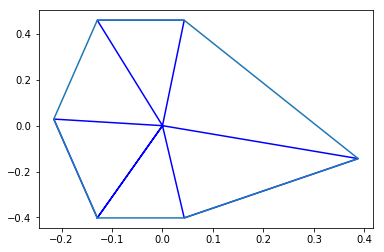

In [249]:
x_s2,y_s2=zip(*plot_coord_with_barycenters)
plt.plot(x_s2,y_s2,'b' )
plt.plot(xs,ys)

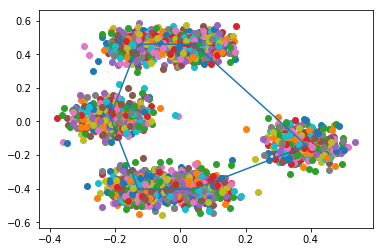

In [250]:
nb_of_polygon=400


list_polygons=[]

for i in range(nb_of_polygon):
    #Random triangle 
    Y=np.empty(shape=(6,2))
    for i in range(len(centralized_coord)):
        Y[i]=np.random.normal(centralized_coord[i],7e-2)
                         
    #Y = np.array([[0.0,0],[0.5,0],[0.25,0.5*sqrt(3)]])
    
    #Mean of each coordinate
    muY = Y.mean(0)
    
    #Centralize data to the mean 
    Y0 = Y-muY
    
    
    #Squared sum of X-mean(X)
    ssY = (Y0**2.).sum()
    
    
    #Frobenius norm of X
    normY = np.sqrt(ssY)
    
    
    # scale to equal (unit) norm
    Y0 /= normY
    
    
    
    #Finding best rotation to superimpose on regular triangle
    #Applying SVD to the  matrix 
    A = np.dot(centralized_coord.T, Y0)
    U,s,Vt = np.linalg.svd(A,full_matrices=False)
    R = np.dot(U,Vt)
    
    #singular_values.append(s)
    
    eigenvalues=np.sqrt(s)
    traceTA = s.sum()
        
    
    Y_transformed =np.dot(Y0,R.transpose())
    #
    #
    # d,Z,(transform)=procrustes(X,Y)
    #
    #
    n=['a1','a2','a3']
    #for i, txt in enumerate(n):
     #   plt.annotate(txt, (Y_transformed[i,0],Y_transformed[i,1]))
    #
    #
   # t2 = plt.triplot(Y_transformed[:,0],Y_transformed[:,1])
    plt.scatter(Y_transformed[:,0],Y_transformed[:,1])
    list_polygons.append(Y_transformed)
    #t3= plt.triplot(Z[:,0],Z[:,1])
    #plt.show()
p1,p2,p3,p4,p5,p6=[],[],[],[],[],[]
for d in range(nb_of_polygon):
    p1.append(list_polygons[d][0])
    p2.append(list_polygons[d][1])
    p3.append(list_polygons[d][2])
    p4.append(list_polygons[d][3])
    p5.append(list_polygons[d][4])
    p6.append(list_polygons[d][5])
p1,p2,p3,p4,p5,p6=np.array(p1), np.array(p2),np.array(p3),np.array(p4), np.array(p5),np.array(p6)  
#
plt.plot(xs,ys)   
mean_p1,mean_p2,mean_p3,mean_p4,mean_p5,mean_p6=p1.mean(0),p2.mean(0),p3.mean(0),p4.mean(0),p5.mean(0),p6.mean(0)
##
mean_p=np.array([mean_p1,mean_p2,mean_p3,mean_p4,mean_p5,mean_p6])    



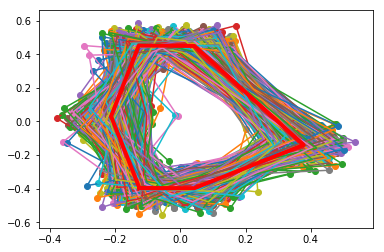

In [251]:
list_polygons_saved=[]
while True:
    old_mean_shape=mean_p
    
    #Calculate mean and move points to the center
    old_mumean_p =old_mean_shape.mean(0)
    old_mean_p0 = old_mean_shape-old_mumean_p
    #Calculate squared sum of X-X_mean
    ss_old_mean_p = (old_mean_p0**2.).sum()
    #Calculate Frobenius norm
    old_norm_mean_p = np.sqrt(ss_old_mean_p)
    #normalize to origin
    old_mean_p0 /= old_norm_mean_p
    
    new_list_polygons=[]
    for Y in list_polygons:
        #Mean of each coordinate
        muY = Y.mean(0)
     
        #Centralize data to the mean 
        Y0 = Y-muY
        
        
        #Squared sum of X-mean(X)
        ssY = (Y0**2.).sum()
        
        
        #Frobenius norm of X
        normY = np.sqrt(ssY)
        
        
        # scale to equal (unit) norm
        Y0 /= normY
        
                
        #Finding best rotation to superimpose on regular triangle
        #Applying SVD to the  matrix 
        A = np.dot(old_mean_p0.T, Y0)
        U,s,Vt = np.linalg.svd(A,full_matrices=False)
        R = np.dot(U,Vt)
        
        
        
        eigenvalues=np.sqrt(s)
        traceTA = s.sum()
            
        
        Y_transformed = np.dot(Y0,R.transpose()) 
        
        #n=['a1','a2','a3']
        #for i, txt in enumerate(n):
         #   plt.annotate(txt, (Y_transformed[i,0],Y_transformed[i,1]))
        #
        #
        t2 = plt.scatter(Y_transformed[:,0],Y_transformed[:,1])
        new_list_polygons.append(Y_transformed)
    p1,p2,p3,p4,p5,p6=[],[],[],[],[],[]
    for d in range(nb_of_polygon):
        p1.append(list_polygons[d][0])
        p2.append(list_polygons[d][1])
        p3.append(list_polygons[d][2])
        p4.append(list_polygons[d][3])
        p5.append(list_polygons[d][4])
        p6.append(list_polygons[d][5])
        
    p1,p2,p3,p4,p5,p6=np.array(p1), np.array(p2),np.array(p3),np.array(p4), np.array(p5),np.array(p6)  
    #
    mean_p1,mean_p2,mean_p3,mean_p4,mean_p5,mean_p6=p1.mean(0),p2.mean(0),p3.mean(0),p4.mean(0),p5.mean(0),p6.mean(0)
    ##
    mean_p=np.array([mean_p1,mean_p2,mean_p3,mean_p4,mean_p5,mean_p6])    
    new_mean_shape=mean_p

   
    threshold=old_mean_shape-new_mean_shape
    
    list_polygons[:]=new_list_polygons[:]
    
    del new_list_polygons[:]
    if np.linalg.norm(threshold)<1e-2:  
        list_polygons_saved[:]=list_polygons
        break
        
for polygon in list_polygons_saved:
    plotting_polygon=np.vstack([polygon,polygon[0]])
    x_plot,y_plot=zip(*plotting_polygon)
    plt.plot(x_plot,y_plot)
    del x_plot,y_plot
        
plotting_mean_shape=np.vstack([mean_p,mean_p[0]])
x_mean,y_mean=zip(*plotting_mean_shape)

plt.plot(x_mean,y_mean,color='r', linewidth=4)

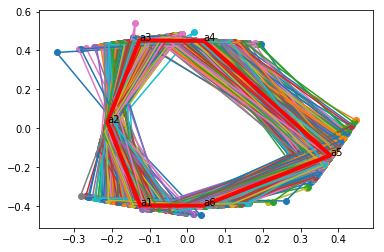

In [252]:
##### Projecting landmarks in tangent direction of their mean #######


p1,p2,p3,p4,p5,p6=[],[],[],[],[],[]
for d in range(nb_of_polygon):
    p1.append(list_polygons_saved[d][0])
    p2.append(list_polygons_saved[d][1])
    p3.append(list_polygons_saved[d][2])
    p4.append(list_polygons_saved[d][3])
    p5.append(list_polygons_saved[d][4])
    p6.append(list_polygons_saved[d][5])
    
    
p1,p2,p3,p4,p5,p6=np.array(p1), np.array(p2),np.array(p3),np.array(p4), np.array(p5),np.array(p6)    
mean_p1,mean_p2,mean_p3,mean_p4,mean_p5,mean_p6=p1.mean(0),p2.mean(0),p3.mean(0),p4.mean(0),p5.mean(0),p6.mean(0)

polygons_with_tangent_projection=np.copy(list_polygons_saved)

for e in range(nb_of_polygon):
    sigma1=(np.linalg.norm(mean_p1,ord=2)**2)/np.dot(p1[e],mean_p1)
    polygons_with_tangent_projection[e][0]=sigma1*p1[e]
    sigma2=(np.linalg.norm(mean_p2,ord=2)**2)/np.dot(p2[e],mean_p2)
    polygons_with_tangent_projection[e][1]=sigma2*p2[e]
    sigma3=(np.linalg.norm(mean_p3,ord=2)**2)/np.dot(p3[e],mean_p3)
    polygons_with_tangent_projection[e][2]=sigma3*p3[e]
    sigma4=(np.linalg.norm(mean_p4,ord=2)**2)/np.dot(p4[e],mean_p4)
    polygons_with_tangent_projection[e][3]=sigma4*p4[e]
    sigma5=(np.linalg.norm(mean_p5,ord=2)**2)/np.dot(p5[e],mean_p5)
    polygons_with_tangent_projection[e][4]=sigma5*p5[e]
    sigma6=(np.linalg.norm(mean_p6,ord=2)**2)/np.dot(p6[e],mean_p6)
    polygons_with_tangent_projection[e][5]=sigma6*p6[e]




for polygon in polygons_with_tangent_projection:
    X_coord=[]
    Y_coord=[]
    for i in range(6):
        X_coord.append(polygon[i][0])
        Y_coord.append(polygon[i][1])
    X_coord_array=np.array(X_coord)
    Y_coord_array=np.array(Y_coord)
    plt.scatter(X_coord_array,Y_coord_array)
mean_shape=np.array([mean_p1,mean_p2,mean_p3,mean_p4,mean_p5,mean_p6])    
#t1 = plt.triplot(mean_p[:,0],mean_p[:,1],c='g')
n=['a1','a2','a3','a4','a5','a6']
for i,txt in enumerate(n):
    plt.annotate(txt,(mean_p[i,0],mean_p[i,1]))


for polygon in polygons_with_tangent_projection:
    plotting_polygon=np.vstack([polygon,polygon[0]])
    x_plot,y_plot=zip(*plotting_polygon)
    plt.plot(x_plot,y_plot)
    del x_plot,y_plot    
    
    
x_mean,y_mean=zip(*plotting_mean_shape)
plt.plot(x_mean,y_mean,color='r', linewidth=4)

In [253]:
# Project set of polygons in 2d and 3d space #
# Dimensionality reduction using Isomap #

from sklearn import manifold

# Centralize data around mean first

#polygons_with_tangent_projection -=polygons_with_tangent_projection.mean(0)
#polygons_with_tangent_projection /=polygons_with_tangent_projection.std(0)



polygons_reshaped=[]
for i in range(nb_of_polygon):
    polygons_reshaped.append(polygons_with_tangent_projection[i].reshape(12))
    
polygons_reshaped=np.array(polygons_reshaped)    


iso=manifold.Isomap(n_neighbors=10,n_components=2)
iso.fit(polygons_reshaped)
manifold_2D=iso.transform(polygons_reshaped)







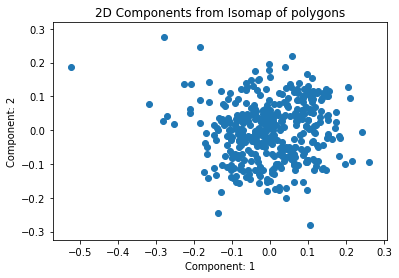

In [254]:
fig = plt.figure()

ax2 = fig.add_subplot(111)
ax2.set_title('2D Components from Isomap of polygons')
ax2.set_xlabel('Component: 1')
ax2.set_ylabel('Component: 2')
ax2.scatter(manifold_2D[:,0],manifold_2D[:,1])

In [255]:
# Inversiong rbf functions to fit data from the projection space to physical space
# The problem is fitting A*Y=X where A is matrix containing functions such as 
# exp{-(epsilon*norm(Y_i-Y_j)**2)} where Y are the data projectes to the lesser
# dimension space

def gauss_rbf(y_i,y_j,epsilon=1e-1):
        norm=np.linalg.norm((y_i-y_j))    
        #return e**((-epsilon*norm)**2)
        #return sqrt(1+(epsilon*np.linalg.norm((y_i-y_j),ord=2))**2) 
        #return norm*6
        if norm==0:
            return 0
        else:
            return  (norm**2)*np.log(norm)
        
def Create_Matrix(Y):
    size=Y.shape[0]
    A=np.zeros((size,size))
    rows,columns=A.shape
    for i in range(rows):
        for j in range(columns):
            A[i][j]=gauss_rbf(Y[i],Y[j])
    return A        
        


In [256]:
# Setting up linear system AX=B. Here,B contains the points  of the polygons in the physical domain
A=Create_Matrix(manifold_2D)
B=polygons_reshaped

# fit AX-B 
Weight_matrix=np.linalg.lstsq(A,B)[0]

# Measure residual error
Predicted_matrix=np.dot(A,Weight_matrix)
error=np.linalg.norm(Predicted_matrix-B)
print(error)

4.25316871541e-08


In [257]:
def get_K(point,Y):
    columns=Y.shape[0]
    array=np.zeros(columns)
    for j in range(columns):
        array[j]=gauss_rbf(point,Y[j])
    return array
    

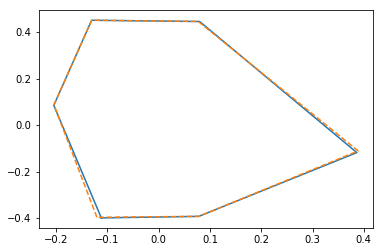

In [258]:
# Sample from latent space
epsilon=1e-3
C_latent=np.array([manifold_2D[102][0]+epsilon,manifold_2D[102][1]+epsilon])


# Compute RBF for sample point
K=get_K(C_latent,manifold_2D)

# Find corresponding point in real space
C=K.dot(Weight_matrix)

# Plotting the polygons for comparison
polygon_physical=polygons_reshaped[102].reshape(6,2)
plot_polygon_physical=np.vstack([polygon_physical,polygon_physical[0]])
x_physical,y_physical=zip(*plot_polygon_physical)
plt.plot(x_physical,y_physical,label='original')


sample_polygon=C.reshape(6,2)
plotting_sample_polygon=np.vstack([sample_polygon,sample_polygon[0]])
x_sample,y_sample=zip(*plotting_sample_polygon)
plt.plot(x_sample,y_sample,'--')




In [259]:
barycenter_list=np.empty([polygons_with_tangent_projection.shape[0],2])

for index,polygon in enumerate(polygons_with_tangent_projection):
    barycenter_x,barycenter_y=polygon[:,0].sum()/6,polygon[:,1].sum()/6
    barycenter_list[index]=[barycenter_x,barycenter_y]

In [260]:
projected_polygons=manifold_2D

In [261]:
import torch
from torch.autograd import Variable
from torch import Tensor
import torch.optim as optim
import torch.nn.functional as F

X_train=Variable(torch.from_numpy(projected_polygons).type(torch.FloatTensor))
Y_train=Variable(torch.from_numpy(barycenter_list).type(torch.FloatTensor))



In [262]:
class myNet(torch.nn.Module):
    
    def __init__(self,n_features,n_hidden,n_output):
        super(myNet,self).__init__()
        self.fc1=torch.nn.Linear(n_features,n_hidden)
        self.fc2=torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return x
    
    
    

In [263]:
# Set hyperparameters #
net = myNet(n_features=2, n_hidden=3, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.001,momentum=0.9)
#optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=0.001)

loss_func = torch.nn.MSELoss()  
#loss_func=torch.nn.SmoothL1Loss()

print(net(X_test_variables))

myNet(
  (fc1): Linear(in_features=2, out_features=3)
  (fc2): Linear(in_features=3, out_features=2)
)
Variable containing:
-0.1588  0.1413
-0.1394  0.1394
-0.1372  0.1320
-0.1418  0.1408
-0.1395  0.1398
-0.1569  0.1402
-0.1567  0.1412
-0.1975  0.1413
-0.1416  0.1413
-0.1447  0.1409
-0.1537  0.1408
-0.1472  0.1416
-0.1725  0.1409
-0.1367  0.1301
-0.1633  0.1413
-0.1635  0.1416
-0.1546  0.1410
-0.1387  0.1369
-0.1393  0.1392
-0.1582  0.1412
-0.1502  0.1411
-0.1466  0.1409
-0.1379  0.1341
-0.1392  0.1386
-0.1415  0.1406
-0.1495  0.1413
-0.1362  0.1284
-0.1596  0.1412
-0.1529  0.1412
-0.1367  0.1301
-0.1517  0.1403
-0.1392  0.1387
-0.1481  0.1415
-0.1516  0.1414
-0.1390  0.1380
-0.1389  0.1378
-0.1501  0.1411
-0.1438  0.1413
-0.1426  0.1410
-0.1517  0.1412
-0.1386  0.1366
-0.1464  0.1414
-0.1396  0.1401
-0.1389  0.1378
-0.1450  0.1412
-0.1768  0.1408
-0.1603  0.1405
-0.1394  0.1393
-0.1415  0.1413
-0.1427  0.1412
-0.1658  0.1407
-0.1389  0.1377
-0.1547  0.1415
-0.1404  0.1409
-0.1483  0.1

In [264]:
nb_of_epochs=1000
batch_size=10
# Train the network #
for t in range(nb_of_epochs):
    sum_loss=0
    for b in range(0,X_train.size(0),batch_size):
        out = net(X_train.narrow(0,b,batch_size))                 # input x and predict based on x
        loss = loss_func(out, Y_train.narrow(0,b,batch_size))     # must be (1. nn output, 2. target), the target label is NOT one-hotted
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        #print(t,loss.data[0])
        sum_loss+=loss.data[0]

        optimizer.step()        # apply gradients
    print("Epoch:",t,"Loss:",sum_loss)
    


Epoch: 0 Loss: 0.638791318051517
Epoch: 1 Loss: 0.25422355672344565
Epoch: 2 Loss: 0.10624167625792325
Epoch: 3 Loss: 0.04875309718772769
Epoch: 4 Loss: 0.02570742482203059
Epoch: 5 Loss: 0.016393447047448717
Epoch: 6 Loss: 0.012602880015037954
Epoch: 7 Loss: 0.011043117257941049
Epoch: 8 Loss: 0.010384359782619867
Epoch: 9 Loss: 0.01009134166088188
Epoch: 10 Loss: 0.009945973652065732
Epoch: 11 Loss: 0.0098599760531215
Epoch: 12 Loss: 0.009798580431379378
Epoch: 13 Loss: 0.009746899399033282
Epoch: 14 Loss: 0.00970095408410998
Epoch: 15 Loss: 0.0096568672961439
Epoch: 16 Loss: 0.00961266852391418
Epoch: 17 Loss: 0.009569897687470075
Epoch: 18 Loss: 0.00952792196039809
Epoch: 19 Loss: 0.009487722600169946
Epoch: 20 Loss: 0.00944841582531808
Epoch: 21 Loss: 0.009411320417711977
Epoch: 22 Loss: 0.009375390174682252
Epoch: 23 Loss: 0.009340273769339547
Epoch: 24 Loss: 0.009307004525908269
Epoch: 25 Loss: 0.00927612653322285
Epoch: 26 Loss: 0.009247247493476607
Epoch: 27 Loss: 0.0092206857

In [265]:

#barycenter_x,barycenter_y=polygons_with_tangent_projection[3][:,0].sum()/6,polygons_with_tangent_projection[3][:,1].sum()/6
#
#plot_polygon(polygons_with_tangent_projection[3],True)
#
#plt.plot(pred_coords[0],pred_coords[1],'bo')
#
#plt.plot(barycenter_x,barycenter_y,'ro')


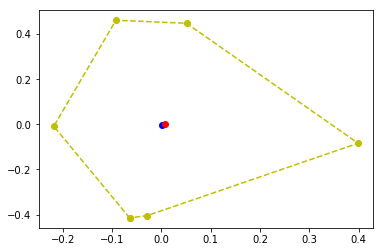

In [299]:
 #Sample from latent space
epsilon=1e-2
C_latent=np.array([manifold_2D[44][0]+epsilon,manifold_2D[44][1]+epsilon])
pred=net(Variable(torch.from_numpy(C_latent).type(torch.FloatTensor)))
pred_coords=pred.data.numpy()


# Compute RBF for sample point
K=get_K(C_latent,manifold_2D)

# Find corresponding point in real space
C=K.dot(Weight_matrix)

## Plotting the polygons for comparison
polygon_physical=polygons_reshaped[3].reshape(6,2)
plot_polygon_physical=np.vstack([polygon_physical,polygon_physical[0]])
x_physical,y_physical=zip(*plot_polygon_physical)
#plt.plot(x_physical,y_physical,label='original')


sample_polygon=C.reshape(6,2)
#barycenter=get_barycenter(sample_polygon)
plotting_sample_polygon=np.vstack([sample_polygon,sample_polygon[0]])
x_sample,y_sample=zip(*plotting_sample_polygon)
barycenter_x,barycenter_y=sample_polygon[:,0].sum()/6,sample_polygon[:,1].sum()/6

plt.plot(x_sample,y_sample,'yo--')
p1ott1=plt.plot(pred_coords[0],pred_coords[1],'bo')
plott2=plt.plot(barycenter_x,barycenter_y,'ro')

#plt.legend((plott1,plott2),
#           ('Approximation', 'barycenter'),
#           scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)


In [302]:
# pick samples from latent space


nb_of_samples=100
noise=1e-2
X_test=np.empty([nb_of_samples,2])

for i in range(nb_of_samples):
    X_test[i]=np.random.normal(projected_polygons[i],noise)
    
X_test_variables=Variable(torch.from_numpy(X_test).type(torch.FloatTensor))
predictions=net(X_test_variables)
sample_polygons=[]
real_barycenters=np.empty([nb_of_samples,2])

for sample in X_test:
    # Compute RBF for sample point
    K=get_K(sample,manifold_2D)
    # Find corresponding point in real space
    polygon=K.dot(Weight_matrix)
    polygon_reshaped=polygon.reshape(6,2)   
    sample_polygons.append(polygon_reshaped)

sample_polygons=np.array(sample_polygons)

for index,polygon in enumerate(sample_polygons):
    #get barycenter
    barycenter=np.array(polygon.sum(0)/6)
    real_barycenters[index]=barycenter
    
pred=predictions.data.numpy()
diff=pred-real_barycenters
MSE=np.power(diff,2).sum()
MSE/=nb_of_samples
print(MSE)

0.00039473283978


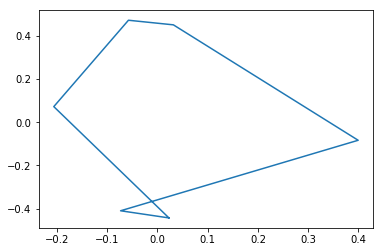

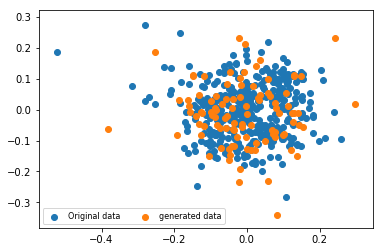

In [301]:
fig1=plt.scatter(projected_polygons[:,0],projected_polygons[:,1], label='original data')
fig2=plt.scatter(Y_test[:,0],Y_test[:,1])

plt.legend((fig1,fig2),
           ('Original data', 'generated data'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)